In [53]:
pip install pandas numpy matplotlib seaborn scikit-learn imblearn xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 219.4 kB/s eta 0:09:30
   ---------------------------------------- 0.1/124.9 MB 328.6 kB/s eta 0:06:20
   ---------------------------------------- 0.1/124.9 MB 437.6 kB/s eta 0:04:46
   ---------------------------------------- 0.1/124.9 MB 473.7 kB/s eta 0:04:24
   ---------------------------------------- 0.2/124.9 MB 482.7 kB/s eta 0:04:19
   ---------------------------------------- 0.2/124.9 MB 491.5 kB/s eta 0:04:14
   ---------------------------------------- 0.2/124.9 MB 509.6 kB/s eta 0:04:05
   ---------------------------------------- 0.3/124.9 MB 568.9 kB/s eta 0:03:40
   ---------------------------------------- 0.3/124.9 MB 576.6 kB/s eta 0:03


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from joblib import dump

import warnings
warnings.filterwarnings("ignore")

### Data Collection and Preprocessing

In [10]:
df = pd.read_csv('advertising - 1.csv')

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
df.shape

(200, 4)

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [12]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [35]:
print(df.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [36]:
# Define preprocessing for numerical columns (impute missing values and scale)
numerical_features = ['TV', 'Radio', 'Newspaper']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [37]:
print("NF: " ,numerical_features)

NF:  ['TV', 'Radio', 'Newspaper']


In [40]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

In [41]:
# Split the data into features and target variable
X = df.drop('Sales', axis=1)
y = df['Sales']

# Apply the preprocessing steps
X_processed = preprocessor.fit_transform(X)

In [42]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [43]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [45]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

### Exploratory Data Analysis (EDA)

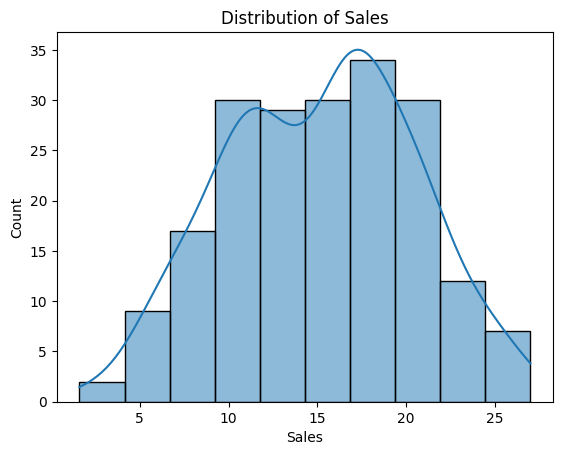

In [48]:
# Visualize the distribution of the target variable
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()


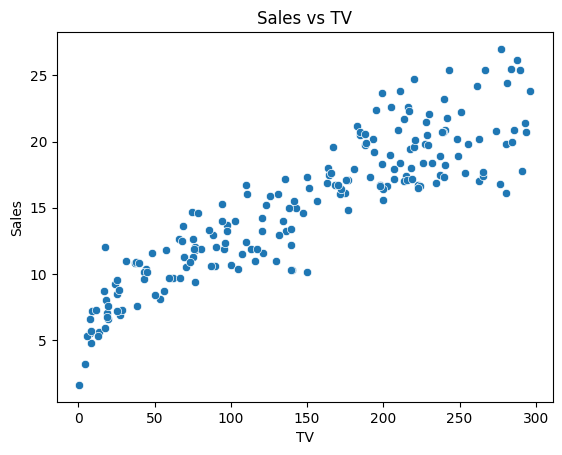

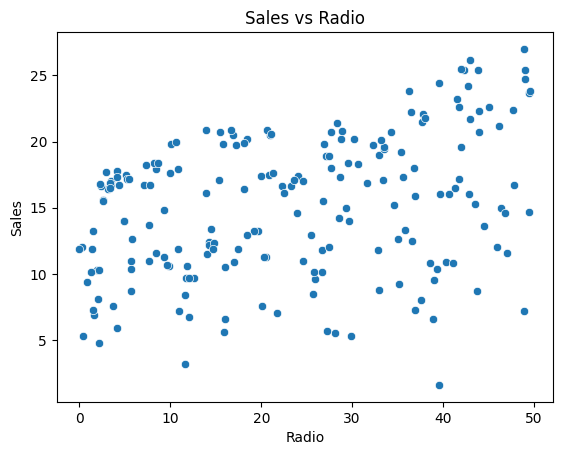

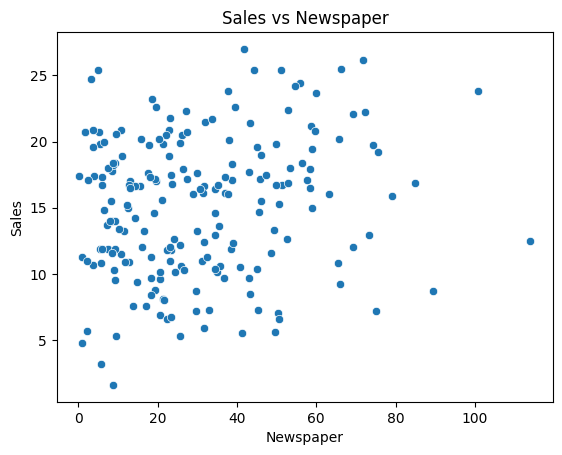

In [49]:
# Visualize relationships between numerical features and the target variable
numerical_df = df[numerical_features]
for col in numerical_df.columns:
    sns.scatterplot(x=df[col], y=df['Sales'])
    plt.title(f'Sales vs {col}')
    plt.show()


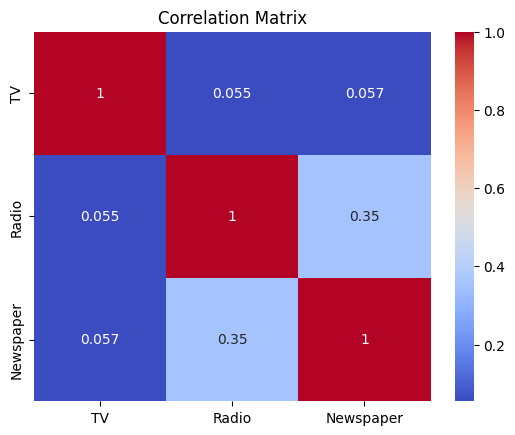

In [50]:
# Check correlations between numerical features
corr = numerical_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Model Building

In [59]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

In [60]:
# Train and evaluate the models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-cv_scores).mean()
    print(f"{name}: RMSE = {rmse:.2f}")

Linear Regression: RMSE = 1.65
Random Forest: RMSE = 1.27
XGBoost: RMSE = 1.38


In [98]:
# Select the best model (assume Random Forest for this example)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [88]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [89]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 1.27
RMSE: 1.71
R-squared: 0.91


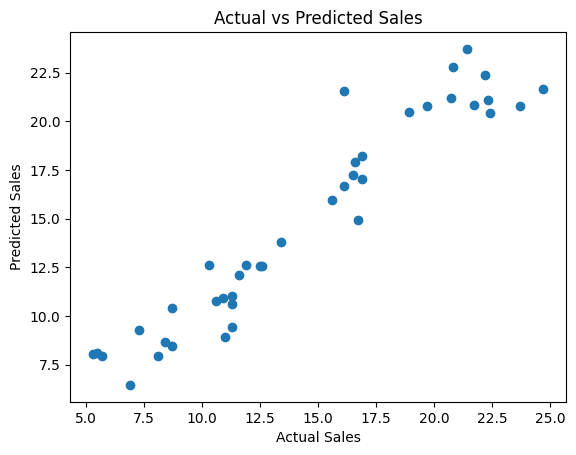

In [90]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

### Hyperparameter Tuning

In [115]:
param_gridlr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [117]:
# Initialize the model
lr = LinearRegression()

# Initialize GridSearchCV (assuming you have defined 'param_gridlr' for LinearRegression)
grid_searchlr = GridSearchCV(estimator=lr, param_grid=param_gridlr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_searchlr.fit(X_train, y_train)

# Get the best parameters and best score
best_params_lr = grid_searchlr.best_params_
best_score_lr = np.sqrt(-grid_searchlr.best_score_)

print(f"Best Parameters for LinearRegression: {best_params_lr}")
print(f"Best RMSE for LinearRegression: {best_score_lr:.2f}")


Best Parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True}
Best RMSE for LinearRegression: 1.66


In [118]:
# Define the parameter grid for LinearRegression
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [119]:
# Initialize the model
rf = RandomForestRegressor()

# Initialize GridSearchCV (assuming you have defined 'param_grid' for RandomForestRegressor)
grid_searchrf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_searchrf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_searchrf.best_params_
best_score_rf = np.sqrt(-grid_searchrf.best_score_)

print(f"Best Parameters for RandomForestRegressor: {best_params_rf}")
print(f"Best RMSE for RandomForestRegressor: {best_score_rf:.2f}")


Best Parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best RMSE for RandomForestRegressor: 1.27


### Final Model and Prediction

In [120]:
# Train the final model with best parameters on the full training set
final_model_rf = RandomForestRegressor(**best_params_rf)
final_model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = final_model_rf.predict(X_test)

# Calculate final evaluation metrics
final_mae_rf = mean_absolute_error(y_test, y_pred_rf)
final_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
final_r2_rf = r2_score(y_test, y_pred_rf)

print(f"RandomForestRegressor Final MAE: {final_mae_rf:.2f}")
print(f"RandomForestRegressor Final RMSE: {final_rmse_rf:.2f}")
print(f"RandomForestRegressor Final R-squared: {final_r2_rf:.2f}")

# Print the test data accuracy
test_data_accuracy_rf = final_r2_rf * 100
print(f"RandomForestRegressor Test Data Accuracy: {test_data_accuracy_rf:.2f}%")


RandomForestRegressor Final MAE: 0.91
RandomForestRegressor Final RMSE: 1.19
RandomForestRegressor Final R-squared: 0.95
RandomForestRegressor Test Data Accuracy: 95.43%


In [127]:
# Train the final model with best parameters on the full training set
final_model_lr = LinearRegression(**best_params_lr)
final_model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = final_model_lr.predict(X_test)

# Calculate final evaluation metrics
final_mae_lr = mean_absolute_error(y_test, y_pred_lr)
final_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
final_r2_lr = r2_score(y_test, y_pred_lr)

print(f"LinearRegression Final MAE: {final_mae_lr:.2f}")
print(f"LinearRegression Final RMSE: {final_rmse_lr:.2f}")
print(f"LinearRegression Final R-squared: {final_r2_lr:.2f}")

# Print the test data accuracy
test_data_accuracy_lr = final_r2_lr * 100
print(f"LinearRegression Test Data Accuracy: {test_data_accuracy_lr:.2f}%")


LinearRegression Final MAE: 1.27
LinearRegression Final RMSE: 1.71
LinearRegression Final R-squared: 0.91
LinearRegression Test Data Accuracy: 90.59%


In [162]:


# Train the final model with best parameters on the full training set
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate final evaluation metrics
final_mae = mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

print(f"Final MAE: {final_mae:.2f}")
print(f"Final RMSE: {final_rmse:.2f}")
print(f"Final R-squared: {final_r2:.2f}")

# Print the test data accuracy
test_data_accuracy = final_r2 * 100
print(f"Test Data Accuracy: {test_data_accuracy:.2f}%")

# Save the final model
dump(final_model, 'final_sales_model.pkl')


Final MAE: 0.93
Final RMSE: 1.23
Final R-squared: 0.95
Test Data Accuracy: 95.12%


['final_sales_model.pkl']

### Function to informed decision 

In [163]:
import joblib

def predict_sales(tv_budget, radio_budget, newspaper_budget):
    # Load the saved model
    loaded_model = joblib.load('final_sales_model.pkl')

    # Create a dataframe for the input budgets
    input_data = pd.DataFrame({
        'TV': [tv_budget],
        'Radio': [radio_budget],
        'Newspaper': [newspaper_budget]
    })

    # Predict sales
    predicted_sales = loaded_model.predict(input_data)

    return predicted_sales[0]

# Example usage with user input
tv_budget = float(input("Enter TV budget: "))
radio_budget = float(input("Enter Radio budget: "))
newspaper_budget = float(input("Enter Newspaper budget: "))

predicted_sales = predict_sales(tv_budget, radio_budget, newspaper_budget)
print(f"Predicted Sales: {predicted_sales:.2f}")


Enter TV budget:  100
Enter Radio budget:  20
Enter Newspaper budget:  10


Predicted Sales: 26.02


In [164]:
# Provided dataset for comparison
comparison_data =df
# Create DataFrame for comparison data
df_comparison = pd.DataFrame(comparison_data)

# Evaluation function
def evaluate_prediction(predicted_sales, df):
    avg_sales = df['Sales'].mean()
    median_sales = df['Sales'].median()
    max_sales = df['Sales'].max()
    min_sales = df['Sales'].min()

    evaluation = f"Predicted Sales: {predicted_sales:.2f}\n"
    evaluation += f"Average Sales in Dataset: {avg_sales:.2f}\n"
    evaluation += f"Median Sales in Dataset: {median_sales:.2f}\n"
    evaluation += f"Max Sales in Dataset: {max_sales:.2f}\n"
    evaluation += f"Min Sales in Dataset: {min_sales:.2f}\n\n"

    if predicted_sales > avg_sales:
        evaluation += "The predicted sales value is above the average sales in the dataset.\n"
    else:
        evaluation += "The predicted sales value is below the average sales in the dataset.\n"

    if predicted_sales > median_sales:
        evaluation += "The predicted sales value is above the median sales in the dataset.\n"
    else:
        evaluation += "The predicted sales value is below the median sales in the dataset.\n"

    if predicted_sales > 0.8 * max_sales:
        evaluation += "The predicted sales value is close to the maximum sales in the dataset.\n"
    elif predicted_sales < 1.2 * min_sales:
        evaluation += "The predicted sales value is close to the minimum sales in the dataset.\n"

    return evaluation

# Compare the predicted sales with the provided data
evaluation = evaluate_prediction(predicted_sales, df_comparison)
print(evaluation)

Predicted Sales: 26.02
Average Sales in Dataset: 15.13
Median Sales in Dataset: 16.00
Max Sales in Dataset: 27.00
Min Sales in Dataset: 1.60

The predicted sales value is above the average sales in the dataset.
The predicted sales value is above the median sales in the dataset.
The predicted sales value is close to the maximum sales in the dataset.



In [166]:
# Load the saved model
model = joblib.load('final_sales_model.pkl')

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 1.51
R^2 Score: 0.95
